TASK1

In [2]:
# sentiment analysis
# including the required libraries
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/chatgpt1.csv")

In [4]:
print(df)
# the dataframe for the following code

                        Datetime             Tweet Id  \
0      2023-01-22 13:44:34+00:00  1617156270871699456   
1      2023-01-22 13:44:39+00:00  1617156291046133761   
2      2023-01-22 13:44:44+00:00  1617156308926349312   
3      2023-01-22 13:44:49+00:00  1617156332297256961   
4      2023-01-22 13:44:52+00:00  1617156345064570880   
...                          ...                  ...   
49996  2023-01-24 06:57:56+00:00  1617778712082096128   
49997  2023-01-24 06:57:59+00:00  1617778726393249792   
49998  2023-01-24 06:58:00+00:00  1617778728481992705   
49999  2023-01-24 06:58:01+00:00  1617778731678044162   
50000  2023-01-24 06:58:01+00:00  1617778733355790342   

                                                    Text         Username  \
0      ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...      mochico0123   
1      @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
2      Schaut Euch an, was @fobizz @DianaKnodel alles...            ciffi   
3      

In [5]:
df.head(10)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
5,2023-01-22 13:45:00+00:00,1617156376983207937,ChatGPT’nin bilinmeyen arka planı: Ucuz iş güc...,GazeteKarinca,https://twitter.com/GazeteKarinca/status/16171...,https://twitter.com/GazeteKarinca,['https://gazetekarinca.com/chatgptnin-bilinme...,['https://t.co/daAyOpRLiM'],0,0,1,0,1617156376983207937,tr,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,[],0
6,2023-01-22 13:45:03+00:00,1617156389217894400,ChatGPT runs 10K Nvidia training GPUs with pot...,FierceElectron,https://twitter.com/FierceElectron/status/1617...,https://twitter.com/FierceElectron,['https://www.fierceelectronics.com/sensors/ch...,['https://t.co/Uhq62t0Uw4'],0,0,0,0,1617156389217894400,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,[],0
7,2023-01-22 13:45:04+00:00,1617156393898745858,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,NaN,NaN,1,0,3,0,1617149595901104130,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='SWENGDAD', id=1460452950875193...",[],0
8,2023-01-22 13:45:06+00:00,1617156404137295878,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,2,1,1617156404137295878,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#ChatGPT', '#midjourney']",2
9,2023-01-22 13:45:07+00:00,1617156405869379585,It will look similar to irobot. The company wi...,EricRIngram,https://twitter.com/EricRIngram/status/1617156...,https://twitter.com/EricRIngram,NaN,NaN,0,0,0,0,1617156405869379585,en,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,Na

In [27]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets for model evaluation.
from sklearn.feature_extraction.text import TfidfVectorizer
# convert text data into numerical feature vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) representation.
from sklearn.ensemble import RandomForestClassifier
# provides the Random Forest Classifier
from sklearn.metrics import accuracy_score,classification_report
# function to calculate the accuracy of a classifier by comparing predicted labels with true labels.
from sklearn.preprocessing import LabelEncoder
# used to encode categorical labels into numerical values.
import nltk
# sentiment analyzer for sentiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# rule-based sentiment analysis tool specifically designed for social media text. It assigns sentiment scores to text based on predefined lexicons.
from sklearn.naive_bayes import MultinomialNB
nltk.download("vader_lexicon") 
# downloading vader_lexicon which is sentiment analysis tool

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:

# Data cleaning and preprocessing
df['Text'] = df['Text'].str.lower()  # dealing lowercase
df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # dealing punctuation
df = df[['Text', 'Language']].dropna()  # Keep only relevant columns and drop rows with missing values

tweets_analyze = df['Text']

<ipython-input-28-8930c3cc4d3b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')  # dealing punctuation


In [29]:
# Train NLTK SentimentIntensityAnalyzer
nltk_analyzer = SentimentIntensityAnalyzer()

# Function to predict sentiment of user input
def predict_sentiment(user_input):
    nltk_scores = nltk_analyzer.polarity_scores(user_input)
    # polrity scores assigns the tweets to numerical data to distinguish between the sentiment
    nltk_compound_score = nltk_scores['compound']
    if nltk_compound_score >= 0.05:
        nltk_sentiment = 'positive'
    elif nltk_compound_score <= -0.05:
        nltk_sentiment = 'negative'
    else:
        nltk_sentiment = 'neutral'
    return nltk_sentiment

In [30]:
# Test the sentiment analysis on CSV data
for tweet in tweets_analyze:
    nltk_sentiment = predict_sentiment(tweet)
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {nltk_sentiment}")
    print("*********************")

Streaming output truncated to the last 5000 lines.
eliza created in 1966 was better and that was 57 years ago
Predicted Sentiment: positive
*********************
Tweet: i love chatgpt httpstcojqucvefyjl
Predicted Sentiment: positive
*********************
Tweet: chatgpt wants to get arranged married after passing usmle
Predicted Sentiment: neutral
*********************
Tweet: and now chatgpt wrote a worm httpstcoa95ehdeged
Predicted Sentiment: neutral
*********************
Tweet: grdecter yeah but can chatgpt bribe a government official
Predicted Sentiment: negative
*********************
Tweet: künstlicheintelligenz so kannst du kitexte erkennen

 chatgpt generiert verblüffend authentische antworten und formulierungen doch das birgt auch gefahren aber wie lassen sich kitexte erkennen

mehr im beitrag von basicthinking httpstcoz0btirqlds
Predicted Sentiment: neutral
*********************
Tweet: morningbrew can i legally change my name chatgpt to say i got into wharton
Predicted Sentiment

In [31]:
user_input = input("Enter a tweet: ")
nltk_sentiment = predict_sentiment(user_input)
print(f"Sentiment analyzed: {nltk_sentiment}")

Enter a tweet: good
Sentiment analyzed: positive


In [35]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 8))
    
    colors = ["black", "green", "red"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    # percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [33]:
import matplotlib.pyplot as plt
# used for plotting

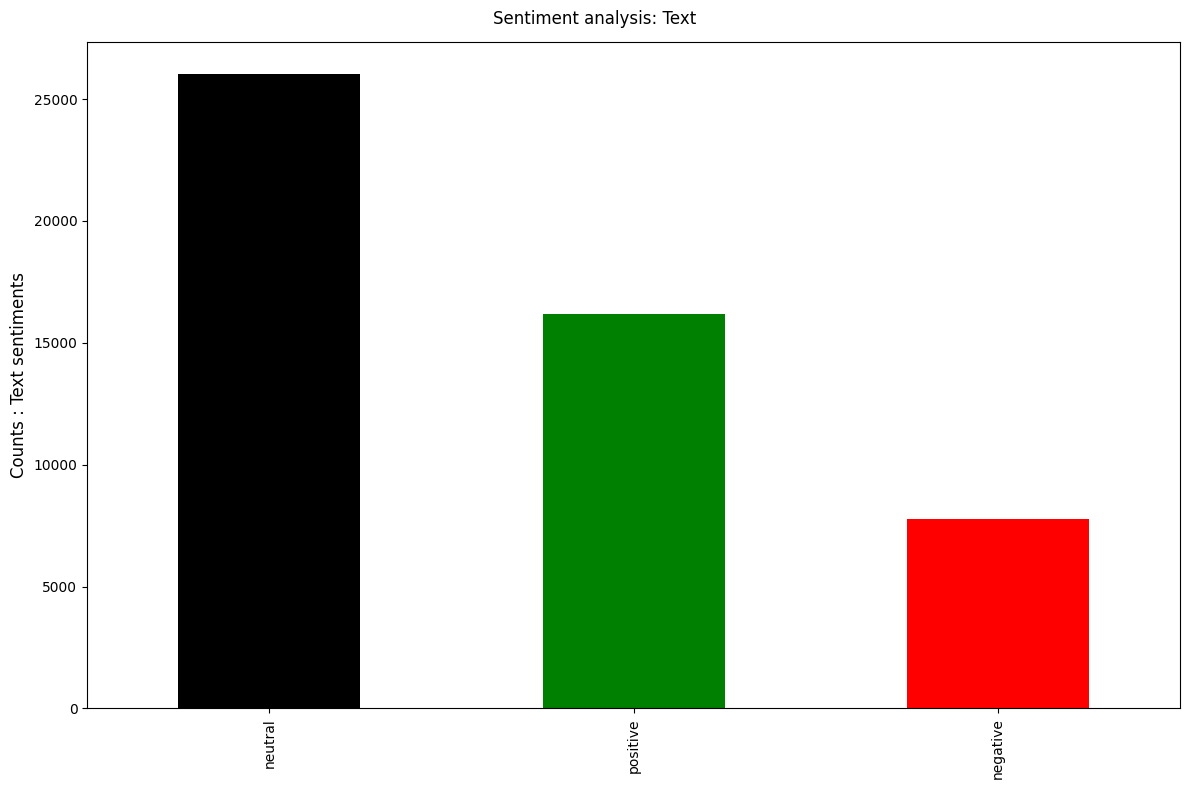

In [36]:
df['text_sentiment'] = df['Text'].apply(lambda x: predict_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

TASK 2


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
# transforms text into numerical representations using the TF-IDF
from sklearn.model_selection import train_test_split
# function that splits the dataset into training and testing sets
from sklearn.neighbors import KNeighborsClassifier
# classification algorithm that assigns labels to samples based on the majority class of their k nearest neighbors in the feature space.
from sklearn.metrics import accuracy_score
# calculates the accuracy of a classification model by comparing the predicted labels with the true labels.

In [38]:
data = pd.read_csv('chatgpt1.csv')

# Extract the text and username columns from the CSV data
tweets = data['Text']
userID = data['Username']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, userID, test_size=0.2, random_state=42)
# setting test data to 20 percent 
# main purpose is to ensure reproducibility and consistency during the development and testing phases.
# A popular value chosen all over the world for the random state is 42. 

In [40]:
# Vectorizing the tweets
vectorizer = TfidfVectorizer() #Term Frequency-Inverse Document Frequency
# numerical representation technique commonly used in natural language processing and information retrieval tasks. 
X_train = vectorizer.fit_transform(X_train)
# transforms the text data into a matrix
X_test = vectorizer.transform(X_test)
# ransforms the text data of the testing set into TF-IDF

# Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the userIDS of test tweets
y_pred = knn.predict(X_test)

In [41]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classify a user input tweet
user_input = input("Enter a tweet: ")
user_input = vectorizer.transform([user_input])
predicted_username = knn.predict(user_input)
print(f"Predicted Username: {predicted_username}")

Accuracy: 0.0420957904209579
Enter a tweet: hello
Predicted Username: ['DoBetterInvest']


Task 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


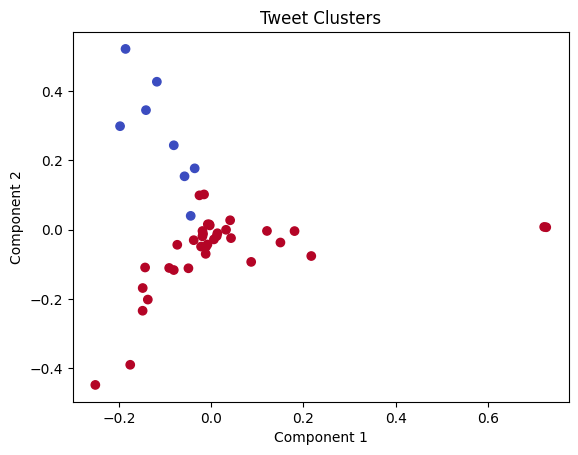

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# PCA is commonly used for various purposes, including data visualization, noise reduction, and feature extraction. 
import matplotlib.pyplot as plt

# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set
features = df['Text']  # You can change this to other features like hashtags if desired

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(features)

# Apply k-means clustering
num_clusters = 2  
# based on the elbow point 
# number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
# Perform dimensionality reduction for visualization (e.g., using PCA)
pca = PCA(n_components=2)
# n_components basically indicates the dimensions and in order plot on matplotlib it is set to 2
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm')
plt.title('Tweet Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Task 4


In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack

In [44]:
# Load the CSV data
data = pd.read_csv('chatgpt1.csv')

# sampling dataset
data = data.sample(n=10000, random_state=42) 

# features for prediction
features_for_predict = ['Text', 'ReplyCount', 'LikeCount', 'QuoteCount', 'Language']

# Preprocess the data
X = data[features_for_predict]
y = data['RetweetCount']



In [45]:
# Convert text features into sparse TF-IDF representation
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(X['Text'])

In [46]:
# prefix='Language' parameter adds the prefix 'Language' to the column names of the resulting dummy variables. 
# The encoded 'Language' feature is stored in the X_language
X_language = pd.get_dummies(X['Language'], prefix='Language')

X_combined = hstack((X[['ReplyCount', 'LikeCount', 'QuoteCount']].astype(float).values, X_language.values, X_text))


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest regression model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# average squared difference between the predicted and true values

Mean Squared Error: 85.89763895872927


In [49]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)
# measure of how well the regression model fits the data, with higher values indicating better fit.

R-squared score: 0.3865160699195691


In [50]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
# average absolute difference between the predicted and true values

Mean Absolute Error: 0.9085375463920103


TASK 5


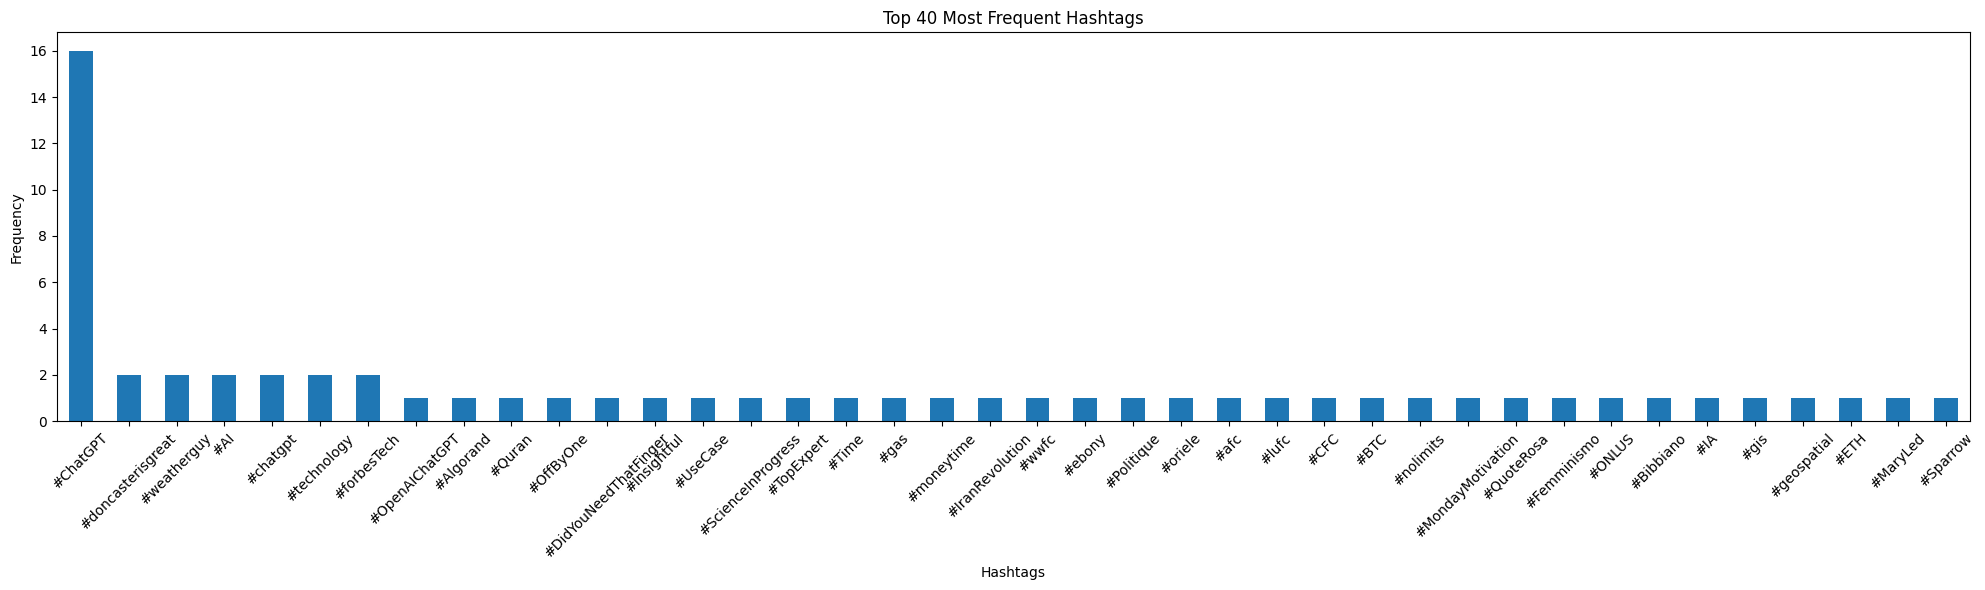

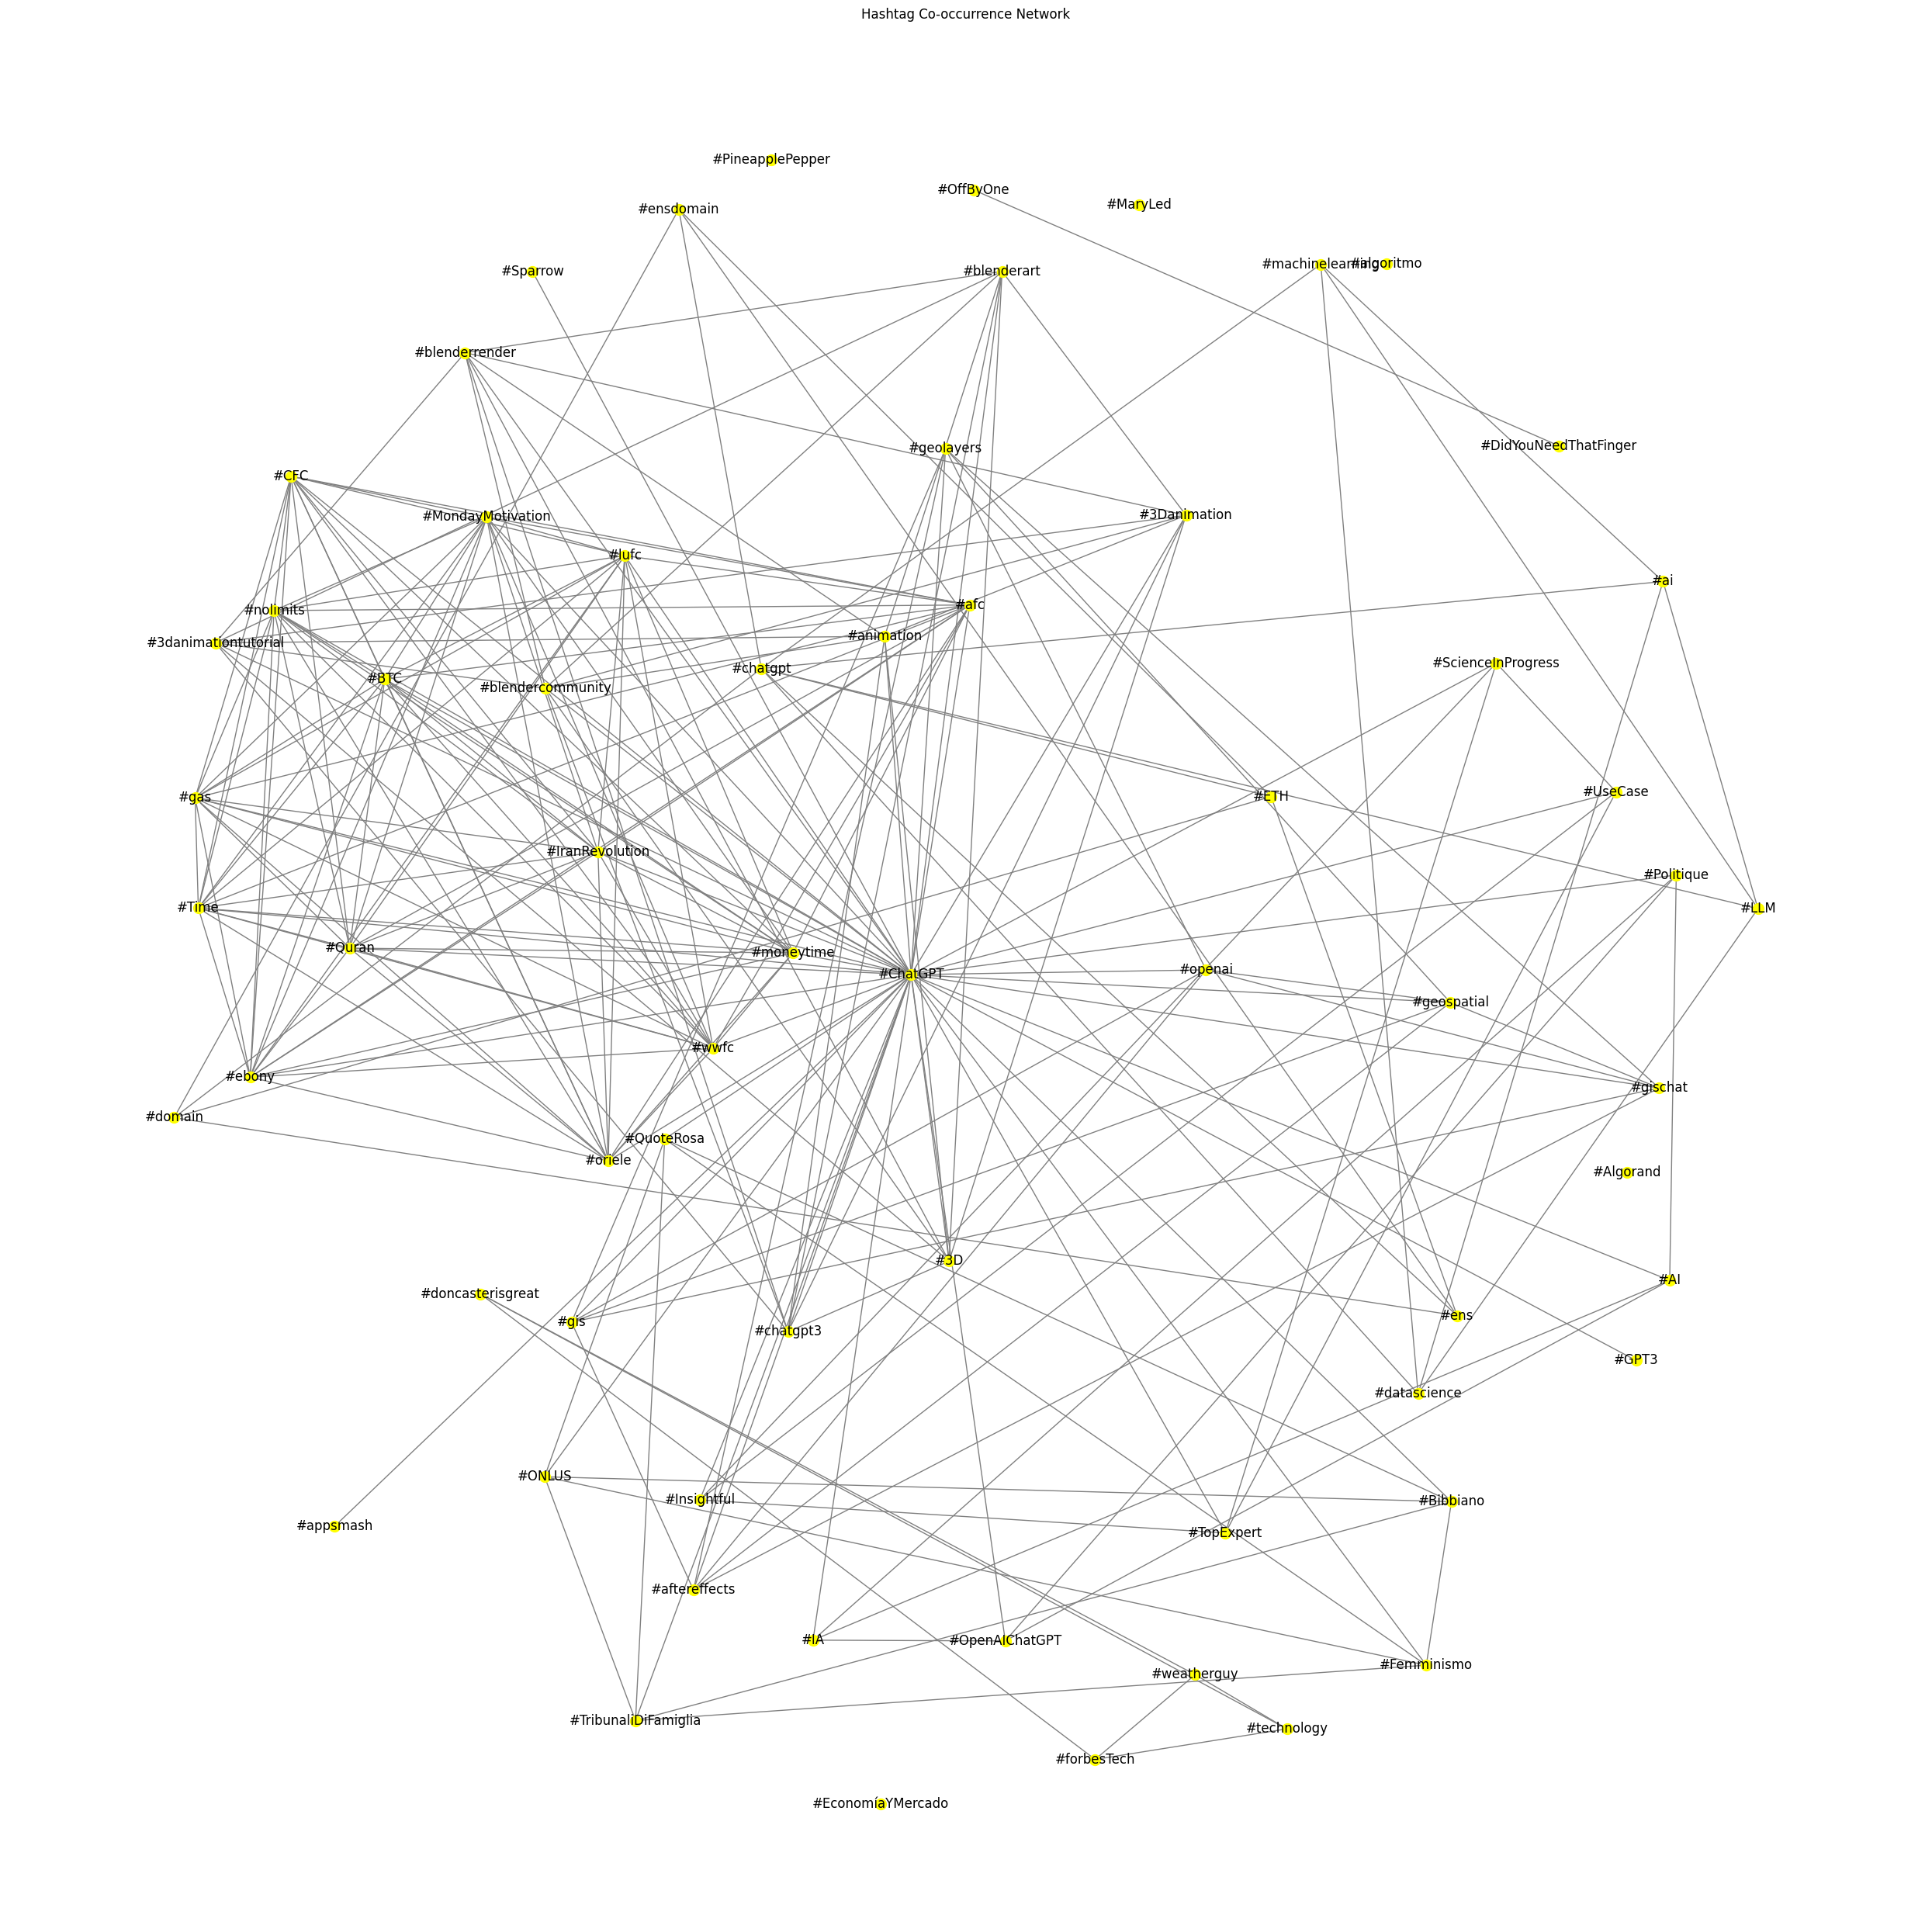

In [65]:
#hashtag analysis
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# access various graph data structures and algorithms provided by the library. 

# Removing duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Extracting hashtags from tweets
df['Hashtags'] = df['Text'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtags_list = df['Hashtags'].sum()
hashtags_count = pd.Series(hashtags_list).value_counts()

# Plot frequency of hashtags
plt.figure(figsize=(20, 6))
hashtags_count.head(40).plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 40 Most Frequent Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identifying common themes or topics
cooccurrence_matrix = pd.DataFrame(0, index=hashtags_count.index, columns=hashtags_count.index)
for hashtags in df['Hashtags']:
    for h1 in hashtags:
        for h2 in hashtags:
            if h1 != h2:
                cooccurrence_matrix.loc[h1, h2] += 1

# Plot co-occurrence matrix as a network graph
G = nx.from_pandas_adjacency(cooccurrence_matrix)
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, pos, node_color='yellow', node_size=100, edge_color='gray', font_size=12)
plt.title('Hashtag Co-occurrence Network')
plt.axis('off')
plt.tight_layout()
plt.show()

